## classfication Maternal Health Risk level.  

In [682]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  classification_report , f1_score, recall_score , precision_score

In [683]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [685]:
df.shape

(1014, 7)

In [686]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [687]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [688]:
df.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [689]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['RiskLevel'] = le.fit_transform(df['RiskLevel'])

In [690]:
df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,-0.211851
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,-0.208797
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,-0.284633
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,-0.479958
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,-0.006680
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,-0.111637
RiskLevel,-0.211851,-0.208797,-0.284633,-0.479958,-0.006680,-0.111637,1.000000


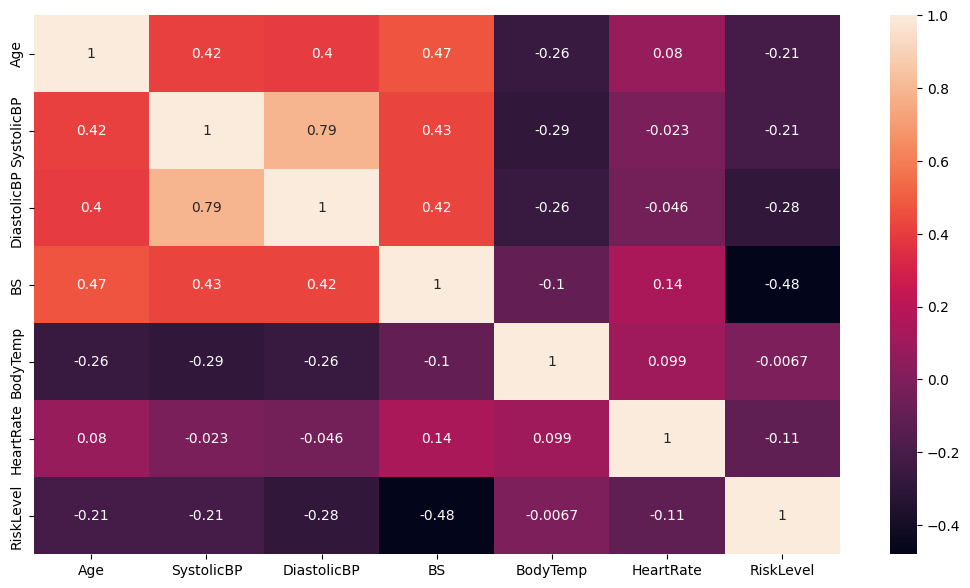

In [691]:
plt.figure(figsize =(13,7))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

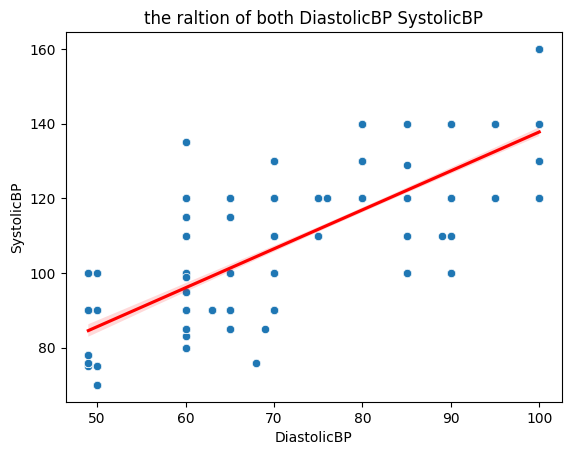

In [692]:
sns.scatterplot(x='DiastolicBP', y='SystolicBP', data=df)
sns.regplot(x='DiastolicBP', y='SystolicBP', data=df , scatter=False, color='red' )
plt.title('the raltion of both DiastolicBP SystolicBP')
#two key measurements used to assess blood pressure and overall cardiovascular health.
#Diastolic Blood Pressure (DiastolicBP) : pressure in your arteries when your heart is at rest between beats.
# Systolic Blood Pressure (SystolicBP) :  The pressure in your arteries when your heart beats and pumps blood.
plt.show()

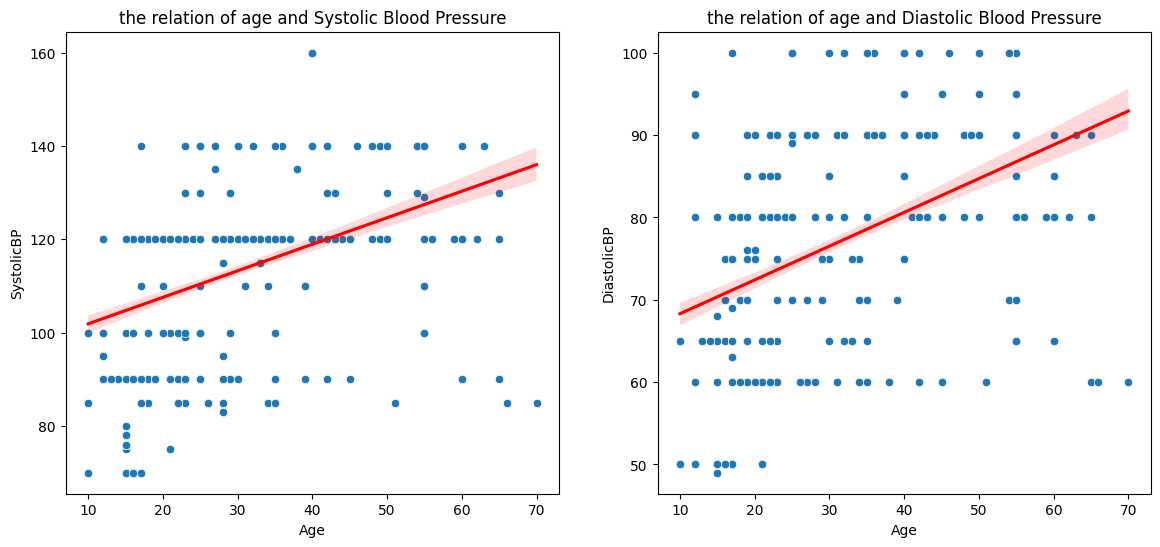

In [693]:
plt.figure(figsize=(14, 6))

# SystolicBP vs Age
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='SystolicBP', data=df)
sns.regplot(x='Age', y='SystolicBP', data=df, scatter=False, color='red')
plt.title('the relation of age and Systolic Blood Pressure')

# DiastolicBP vs Age
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='DiastolicBP', data=df)
sns.regplot(x='Age', y='DiastolicBP', data=df, scatter=False, color='red')
plt.title('the relation of age and Diastolic Blood Pressure')

plt.show()


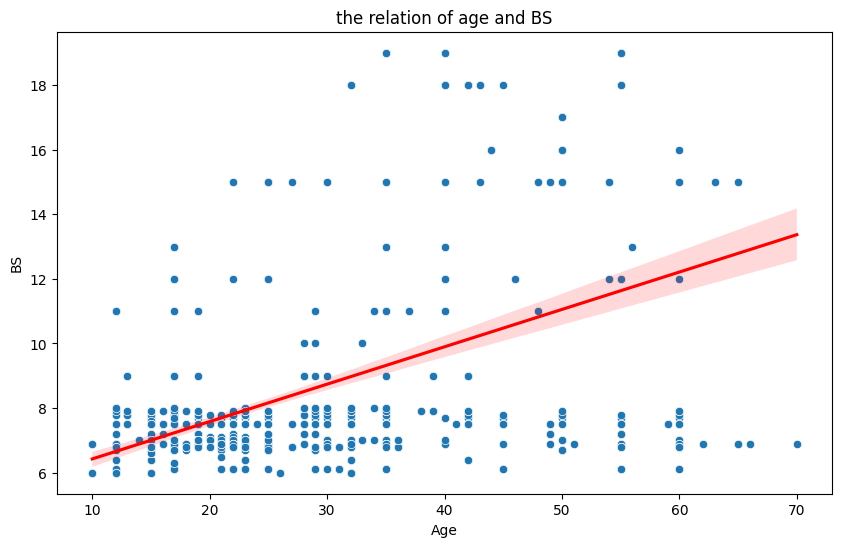

In [694]:
# BS is blood suger
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BS', data=df)
sns.regplot(x='Age', y='BS', data=df, scatter=False, color='red')
plt.title('the relation of age and BS')
plt.show()

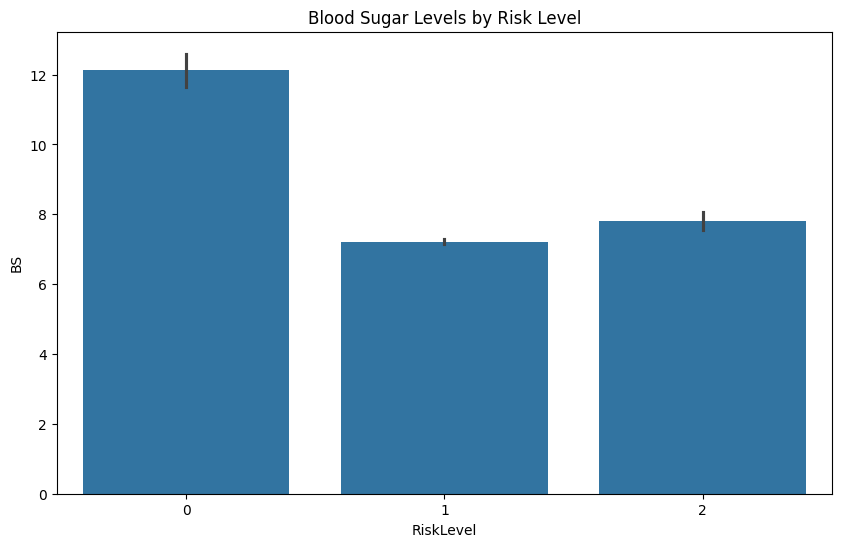

In [695]:
plt.figure(figsize=(10, 6))
sns.barplot(x='RiskLevel', y='BS', data=df)
plt.title('Blood Sugar Levels by Risk Level')
plt.show()

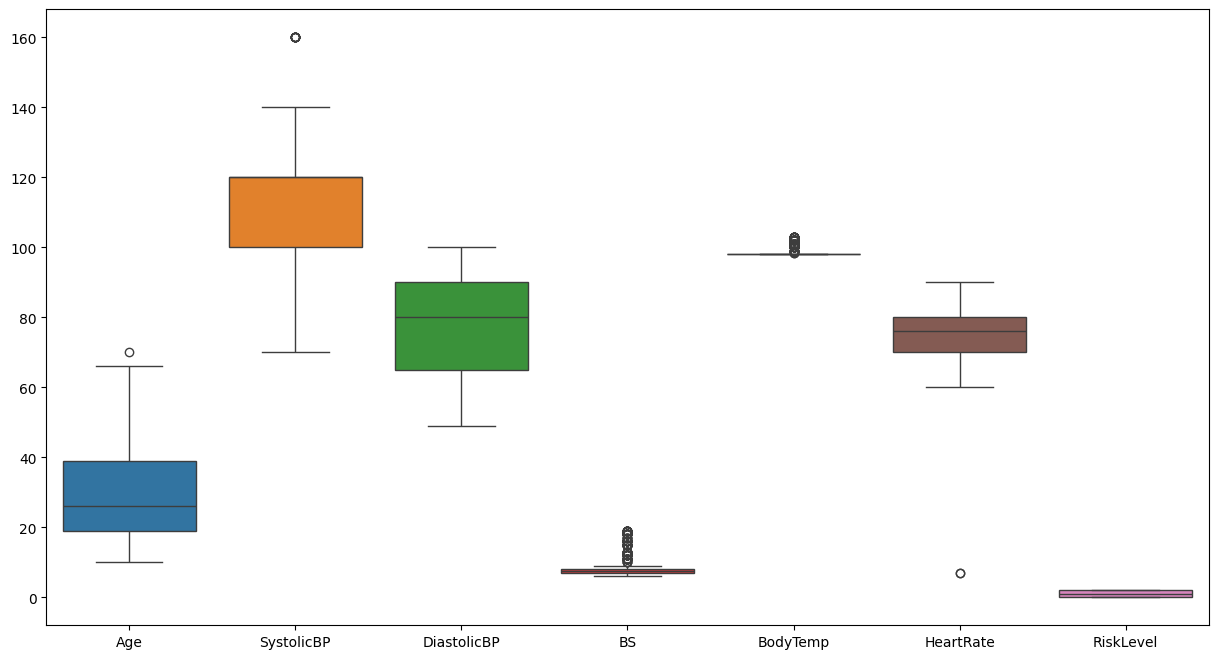

In [696]:
plt.figure(figsize =(15,8))
sns.boxplot(data=df)
plt.show()

low risk  0  mid risk  0  high risk  0


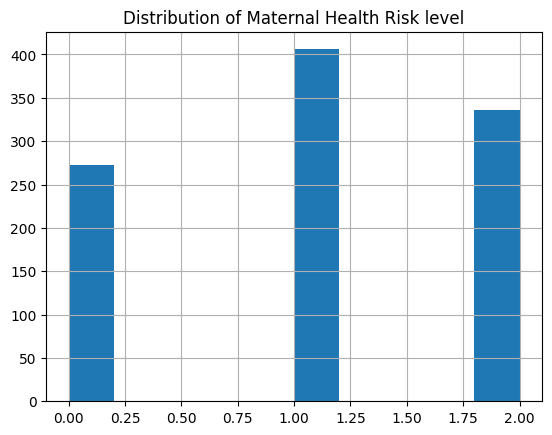

In [697]:
low_risk = df[df['RiskLevel'] == 'low risk']
mid_risk = df[df['RiskLevel'] == 'mid risk']
high_risk = df[df['RiskLevel'] == 'high risk']

print ('low risk ' ,low_risk.shape[0] , ' mid risk ', mid_risk.shape[0] , ' high risk ' , high_risk.shape[0] )
df['RiskLevel'].hist()
plt.title('Distribution of Maternal Health Risk level')
plt.show()

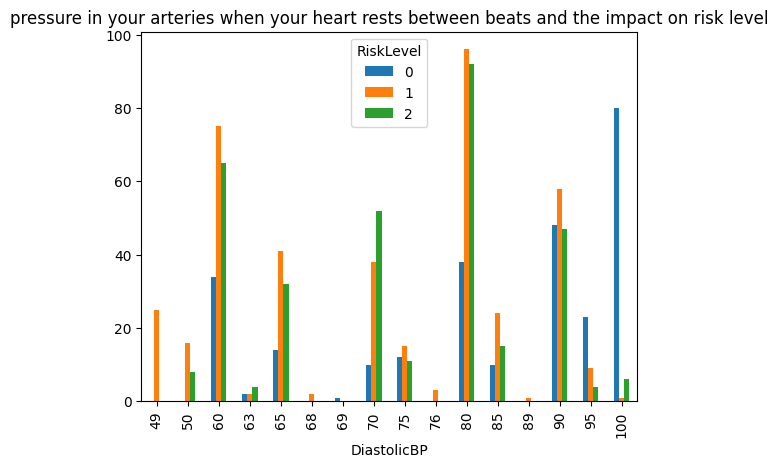

In [698]:
age = pd.crosstab(df['DiastolicBP'] , df['RiskLevel'])
age.plot(kind='bar')
plt.title('pressure in your arteries when your heart rests between beats and the impact on risk level')
plt.show()

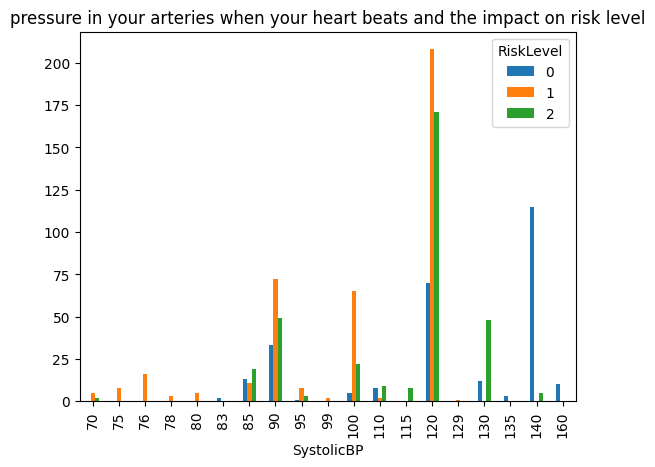

In [699]:
age = pd.crosstab(df['SystolicBP'] , df['RiskLevel'])
age.plot(kind='bar')
plt.title('pressure in your arteries when your heart beats and the impact on risk level')
plt.show()

In [744]:
x = df.drop(['RiskLevel'], axis=1)
y = df['RiskLevel']

x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=32)

In [745]:
from sklearn.preprocessing import  MinMaxScaler


MMS = MinMaxScaler()

x_train = MMS.fit_transform(x_train)
x_test = MMS.transform(x_test)

In [764]:
from xgboost import XGBClassifier

xg = XGBClassifier()

xg.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [765]:
pre_xg = xg.predict(x_test)

print("Acurracy : ", accuracy_score(pre_xg , y_test))

Acurracy :  0.8719211822660099


In [762]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


rf.fit(x_train, y_train)


RandomForestClassifier()

In [763]:

tffpre = rf.predict(x_test)

report = classification_report (y_test, tffpre)

print('accuracy ',accuracy_score(tffpre , y_test))
print('report ',report )

accuracy  0.8768472906403941
report                precision    recall  f1-score   support

           0       0.92      0.94      0.93        47
           1       0.91      0.82      0.86        82
           2       0.83      0.91      0.86        74

    accuracy                           0.88       203
   macro avg       0.88      0.89      0.88       203
weighted avg       0.88      0.88      0.88       203



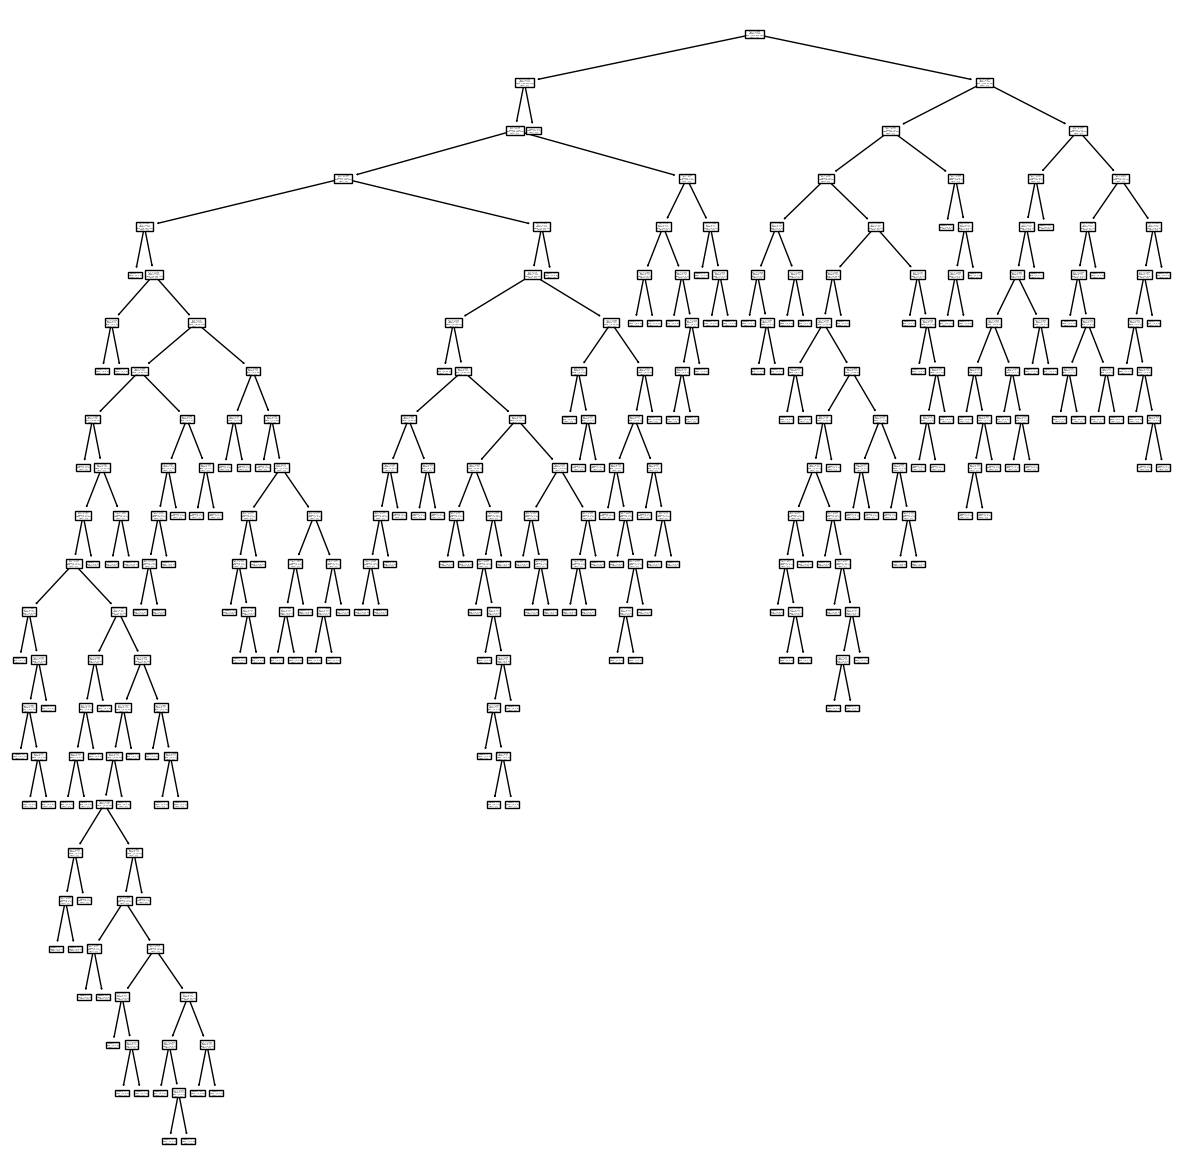

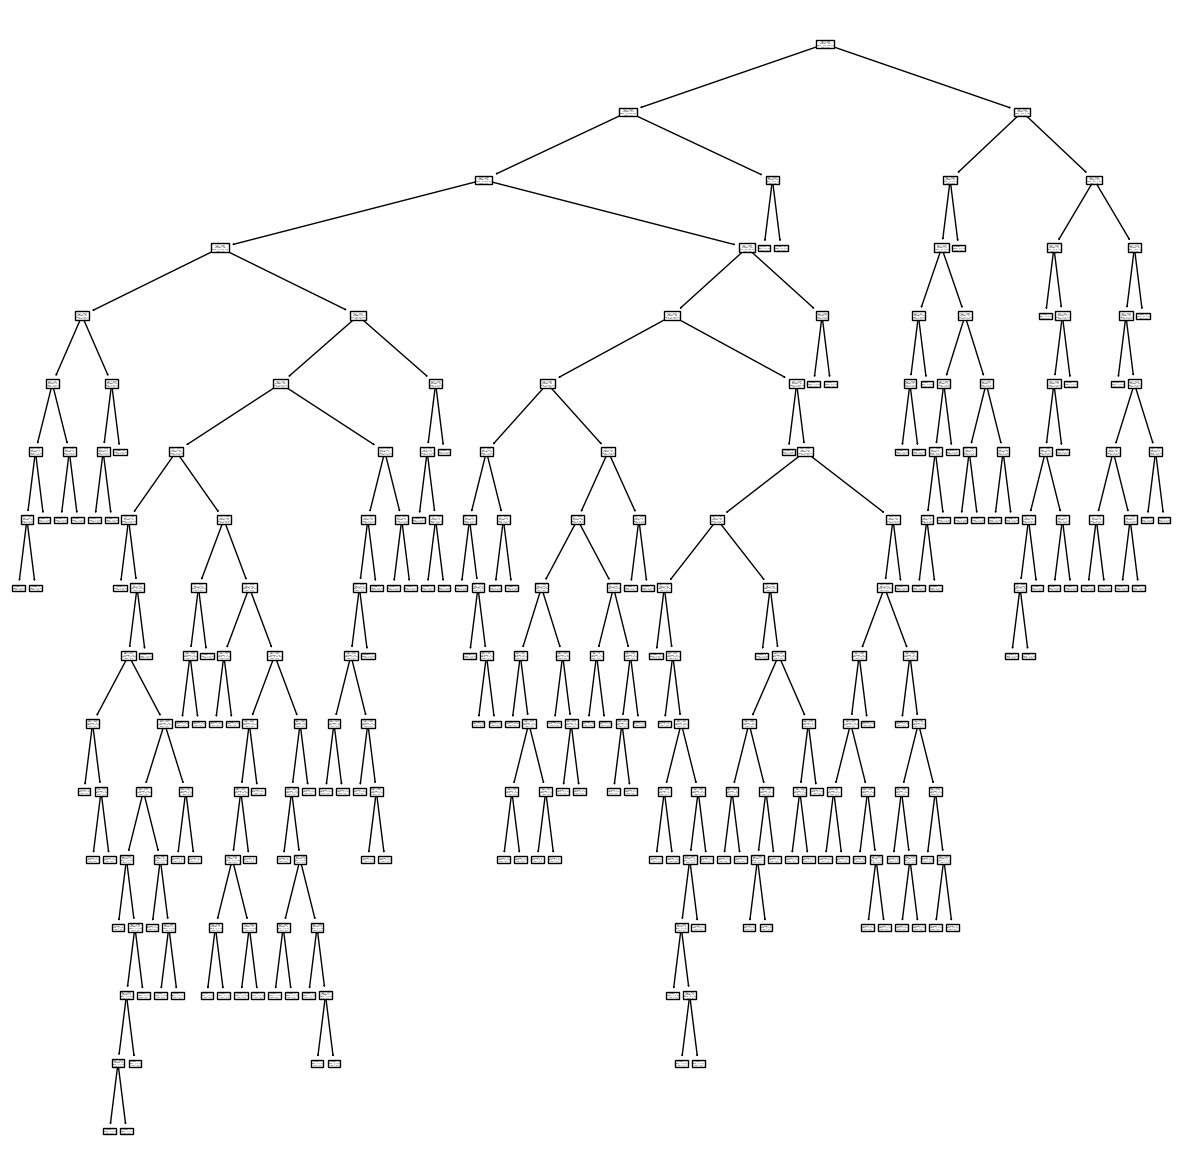

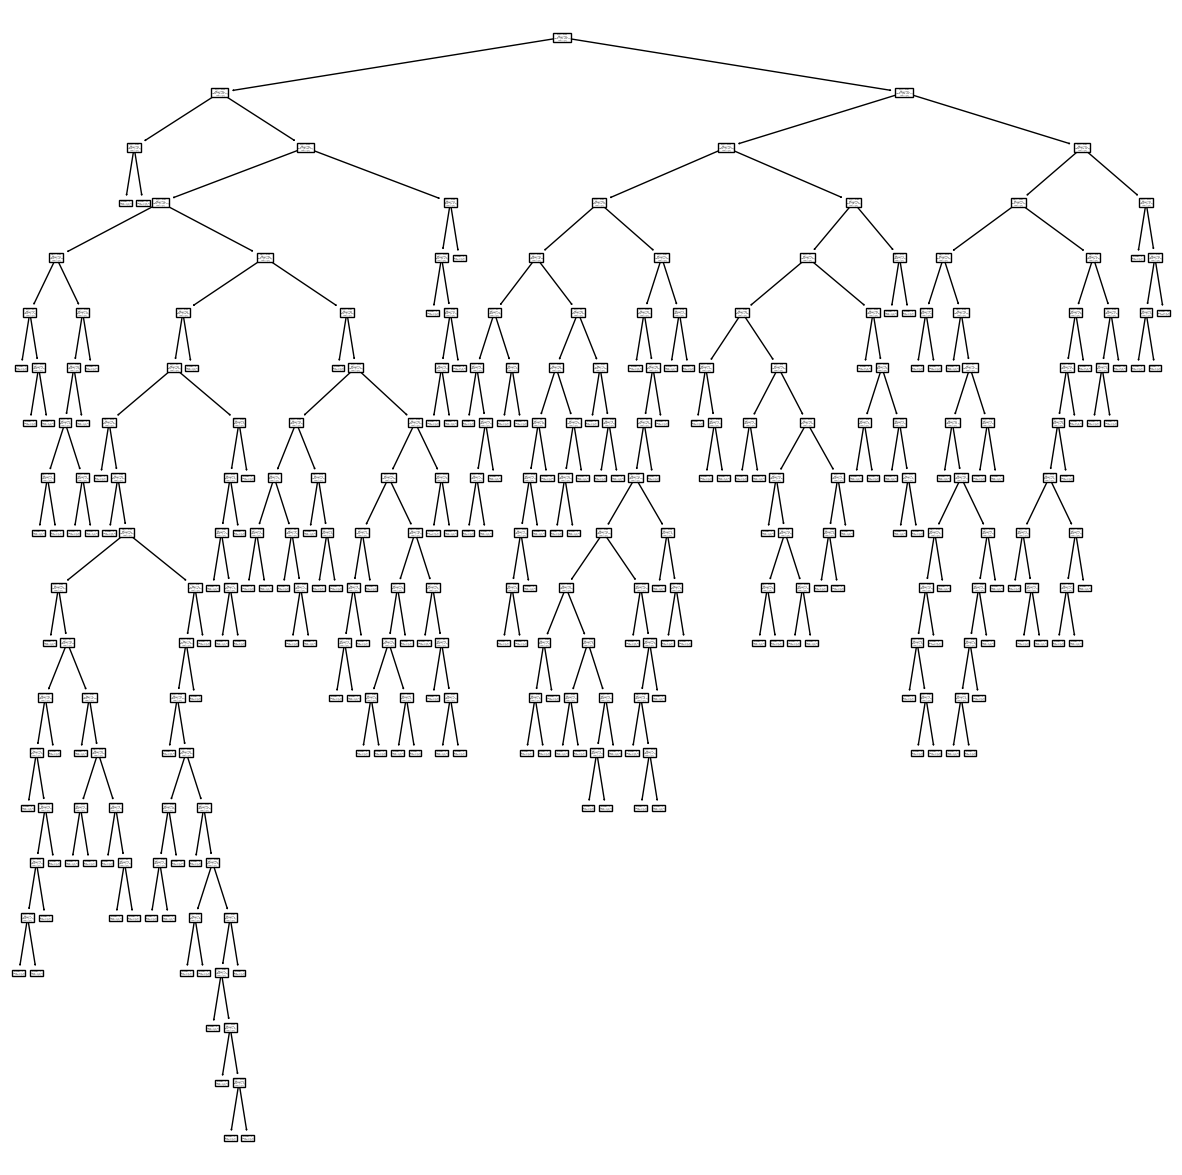

In [752]:
from sklearn.tree import plot_tree

for i in range(3):  # Visualize first three trees
    plt.figure(figsize=(15, 15))
    plot_tree(rf[i], class_names=True)
    plt.show()